Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

In [1]:
import numpy as np
import scipy.special as sc
from scipy.linalg import solve

For the integral, we use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, we see that the appropriate orthogonal polynomials are shifted Legendre polynomials $P_n^{*}$.

The corresponding roots and weights are computed with scipy's `ps_roots`.

In [2]:
a, b = 0, 1

lmbda = 0.5     # abbreviate because `lambda` is a keyword 

# Kernel
def K(x, t):
    return 1

def g(x):
    return np.sin(np.pi*x)

In [3]:
x, w = sc.ps_roots(3)
x, w

(array([0.11270167, 0.5       , 0.88729833]),
 array([0.27777778, 0.44444444, 0.27777778]))

In [4]:
def solve_e1(N):
    x, w = sc.ps_roots(N)

    # construct the weight matrix
    Kmat = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            Kmat[i, j] = w[j] * K(x[i], x[j])


    lhs = np.eye(N) - lmbda*Kmat
    rhs = [g(_) for _ in x]
    
    soln = solve(lhs, rhs)
    return x, soln

In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


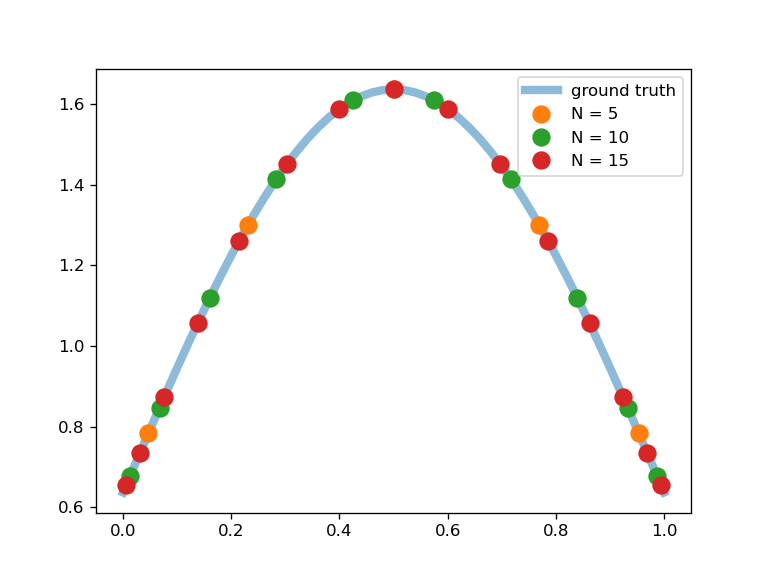

In [6]:
xx = np.linspace(0, 1, 51)
plt.plot(xx, np.sin(np.pi*xx) + 2./np.pi, '-', lw=5, alpha=0.5, label='ground truth')

for N in [5, 10, 15]:
    x, y = solve_e1(N)
    plt.plot(x, y, 'o', lw=3, ms=10, label='N = %s' % N)
    
plt.legend(loc='best')

An obvious issue with this function is that it returns the solution on a fixed set of points. We do not control precise positions of these points and we should not interpolate them. 

$x(t)=\lambda \sum_jA_j K(t,s_j)x(s_j)+f(t)$